In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

In [231]:
RANDOM_STATE = 110

train_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/train_data.csv")
test_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/test_data.csv")

전처리

In [232]:
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Dispenser_num
0,AJX75334505,4F1XA938-1,240,2.5,-90,100,1030,-90,16,14.9,...,243.7,243.7,114.612,19.9,7,127,1,NaN,Normal,#1
1,AJX75334505,3KPM0016-2,240,2.5,-90,70,1030,-90,10,21.3,...,243.7,243.7,85.000,19.6,7,185,1,0.0,Normal,#1
2,AJX75334501,4E1X9167-1,1000,12.5,90,85,280,90,16,14.7,...,243.5,243.5,114.612,19.8,10,73,1,NaN,Normal,#2
3,AJX75334501,3K1X0057-1,1000,12.5,90,70,280,90,10,21.3,...,243.5,243.5,85.000,19.9,12,268,1,0.0,Normal,#2
4,AJX75334501,3HPM0007-1,240,2.5,-90,70,1030,-90,10,9.7,...,243.7,243.7,85.000,19.7,8,121,1,0.0,Normal,#1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,2.5,-90,70,1030,-90,10,17.0,...,243.7,243.7,85.000,19.2,1,318,1,0.0,Normal,#1
40502,AJX75334501,4E1XC796-1,1000,12.5,90,100,280,90,16,14.9,...,243.5,243.5,114.612,20.5,14,197,1,NaN,Normal,#2
40503,AJX75334501,4C1XD438-1,240,2.5,-90,100,1030,-90,16,14.2,...,243.7,243.7,85.000,19.7,1,27,1,NaN,Normal,#1
40504,AJX75334501,3I1XA258-1,1000,12.5,90,70,280,90,10,9.7,...,243.5,243.5,85.000,20.1,13,117,1,0.0,Normal,#2


In [184]:
columns_to_drop = []

train_data = train_data.drop(columns = columns_to_drop, inplace=False)
test_data = test_data.drop(columns = columns_to_drop, inplace=False)

In [233]:
# List of columns to drop
columns_to_drop = [
    "CURE START POSITION X Collect Result_Dam",
    "CURE START POSITION ? Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam",
    "Head Purge Position Z Collect Result_Dam",
    "Head Zero Position Y Collect Result_Dam",
    "PalletID Collect Result_Dam",
    "Stage1 Circle2 Distance Speed Collect Result_Dam",
    "Stage1 Circle3 Distance Speed Collect Result_Dam",
    "Stage1 Circle4 Distance Speed Collect Result_Dam",
    "Stage1 Line1 Distance Speed Collect Result_Dam",
    "Stage1 Line2 Distance Speed Collect Result_Dam",
    "Stage1 Line3 Distance Speed Collect Result_Dam",
    "Stage1 Line4 Distance Speed Collect Result_Dam",
    "Stage2 Circle2 Distance Speed Collect Result_Dam",
    "Stage2 Circle3 Distance Speed Collect Result_Dam",
    "Stage2 Circle4 Distance Speed Collect Result_Dam",
    "Stage2 Line2 Distance Speed Collect Result_Dam",
    "Stage2 Line3 Distance Speed Collect Result_Dam",
    "Stage2 Line4 Distance Speed Collect Result_Dam",
    "Stage3 Circle2 Distance Speed Collect Result_Dam",
    "Stage3 Circle3 Distance Speed Collect Result_Dam",
    "Stage3 Circle4 Distance Speed Collect Result_Dam",
    "Stage3 Line2 Distance Speed Collect Result_Dam",
    "Stage3 Line3 Distance Speed Collect Result_Dam",
    "Stage3 Line4 Distance Speed Collect Result_Dam",
    "THICKNESS 2 Collect Result_Dam",
    "THICKNESS 3 Collect Result_Dam",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1",
    "PalletID Collect Result_Fill1",
    "Production Qty Collect Result_Fill1",
    "HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2",
    "HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2",
    "PalletID Collect Result_Fill2",
    "Production Qty Collect Result_Fill2",
    'CURE END POSITION Z Collect Result_Dam','CURE END POSITION Θ Collect Result_Dam'
]

# Drop the specified columns from both datasets
test_data_cleaned = test_data.drop(columns=columns_to_drop, errors='ignore')
train_data_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

In [234]:
train_data_cleaned['WorkMode Collect Result_Fill2'].value_counts()

WorkMode Collect Result_Fill2
0.0    16447
Name: count, dtype: int64

In [235]:
train_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'].value_counts()
test_data_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2
OK    4881
Name: count, dtype: int64

In [236]:
object_columns = train_data_cleaned.dtypes[train_data_cleaned.dtypes == 'object']

# Check if there are any columns with object data type
if not object_columns.empty:
    print("Columns with object data type:")
    print(object_columns)
else:
    print("No columns with object data type found.")

Columns with object data type:
Model.Suffix                                               object
Workorder                                                  object
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam      object
Chamber Temp. Judge Value_AutoClave                        object
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave       object
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave          object
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1    object
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2    object
target                                                     object
Dispenser_num                                              object
dtype: object


In [237]:
train_data_cleaned.isna().sum

<bound method DataFrame.sum of        Model.Suffix  Workorder  CURE END POSITION X Collect Result_Dam  \
0             False      False                                   False   
1             False      False                                   False   
2             False      False                                   False   
3             False      False                                   False   
4             False      False                                   False   
...             ...        ...                                     ...   
40501         False      False                                   False   
40502         False      False                                   False   
40503         False      False                                   False   
40504         False      False                                   False   
40505         False      False                                   False   

       CURE SPEED Collect Result_Dam  \
0                              False   


In [238]:
columns_to_drop = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Chamber Temp. Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
                   'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop, errors='ignore')
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop, errors='ignore')

In [240]:
test_data_cleaned.columns.to_list()

['Set ID',
 'Model.Suffix',
 'Workorder',
 'CURE END POSITION X Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
 'Machine Tact time Collect Result_Dam',
 'Production Qty Collect Result_Dam',
 'Receip No Collect Result_Dam',
 'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam'

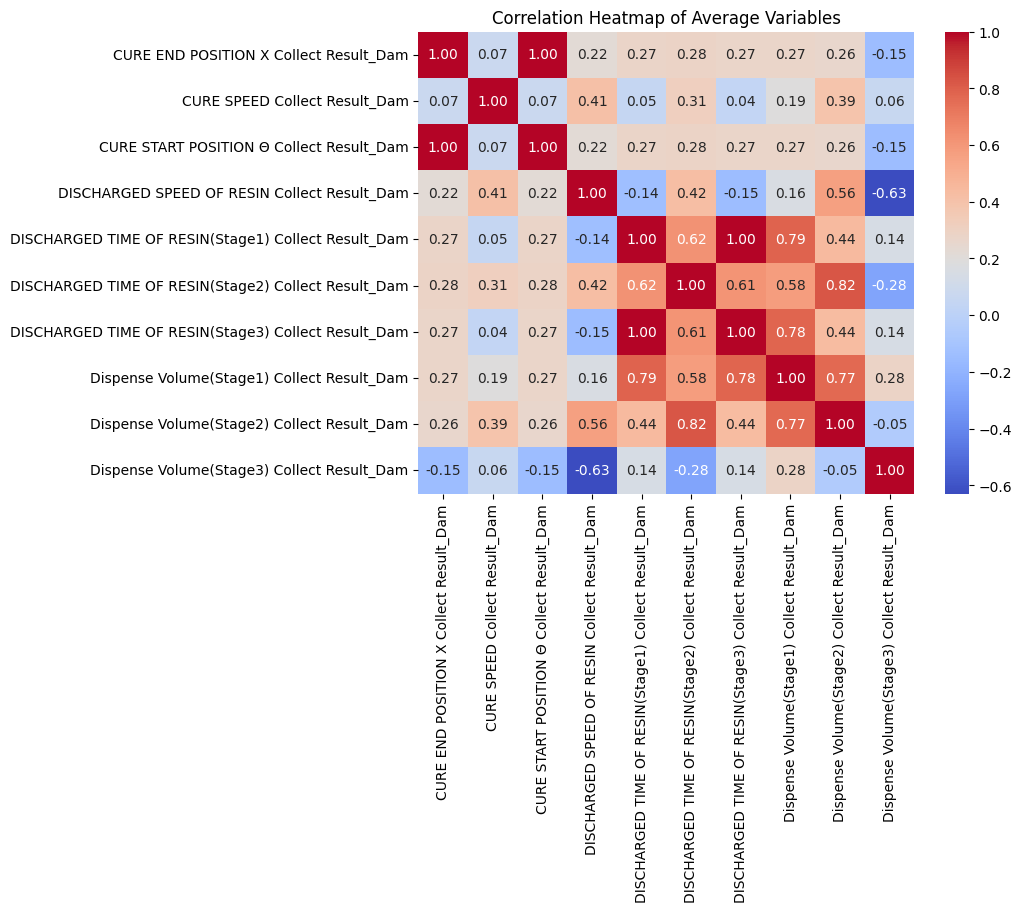

In [241]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Dam',
    'CURE SPEED Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'DISCHARGED SPEED OF RESIN Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
    'Dispense Volume(Stage1) Collect Result_Dam',
    'Dispense Volume(Stage2) Collect Result_Dam',
    'Dispense Volume(Stage3) Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [242]:
columns_to_drop = ['CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
                   'Dispense Volume(Stage2) Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [243]:
train_data_cleaned.columns.to_list()

['Model.Suffix',
 'Workorder',
 'CURE END POSITION X Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
 'Machine Tact time Collect Result_Dam',
 'Production Qty Collect Result_Dam',
 'Receip No Collect Result_Dam',
 'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam',
 'THICKNESS 1 Collect Result_Dam',
 'WorkMode Collect

In [244]:
columns_to_drop = ['Production Qty Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

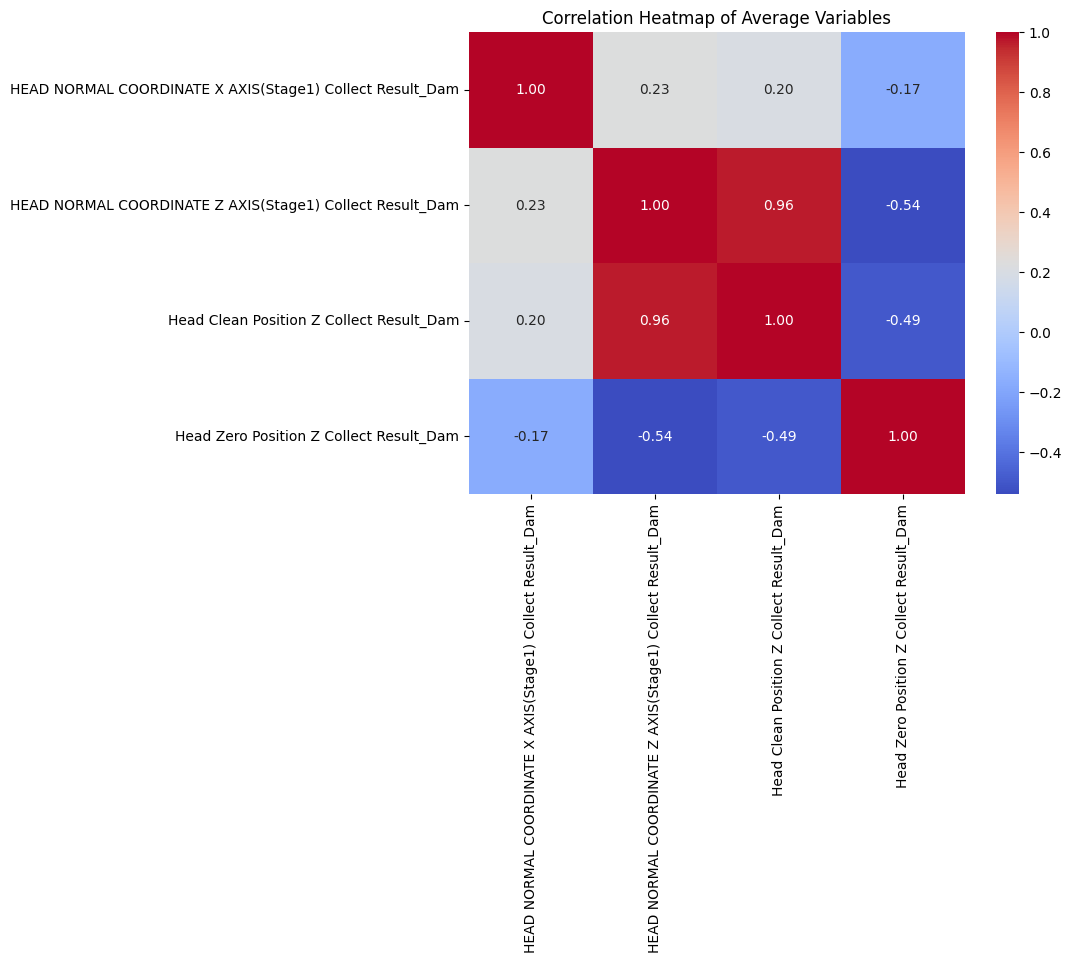

In [245]:
# Select the new average variables
avg_variables = [
   'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Zero Position Z Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [246]:
columns_to_drop = ['Head Clean Position Z Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

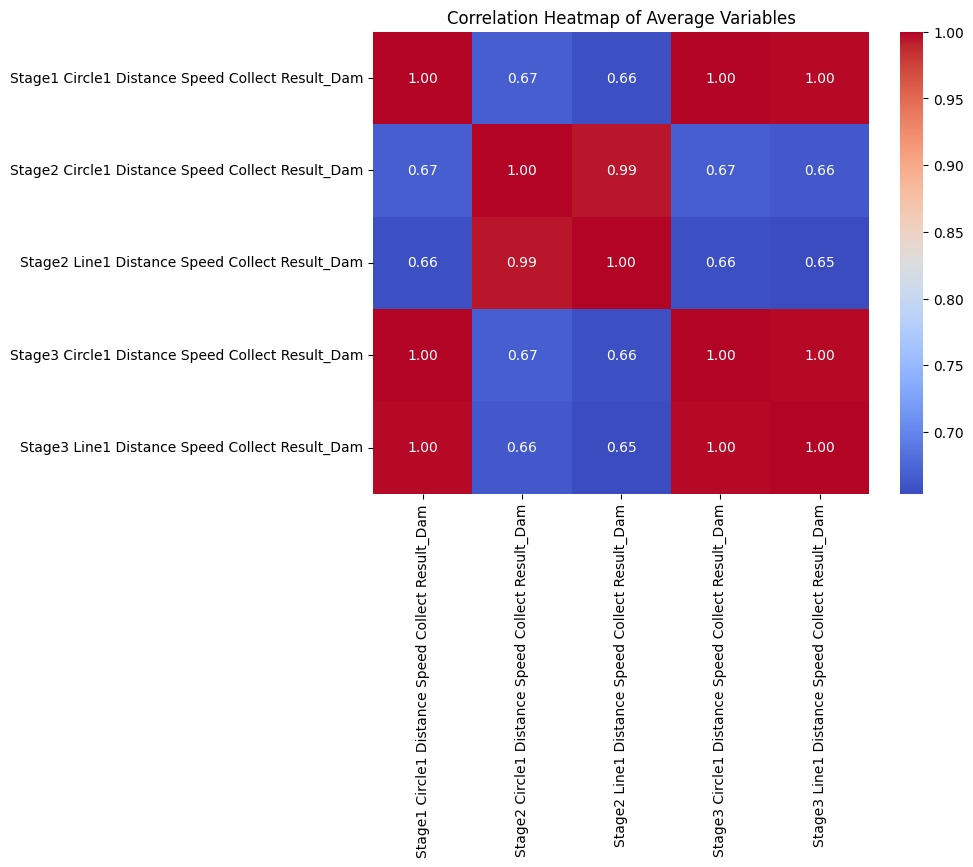

In [247]:
# Select the new average variables
avg_variables = [
    'Stage1 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Circle1 Distance Speed Collect Result_Dam',
 'Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [248]:
columns_to_drop = ['Stage2 Line1 Distance Speed Collect Result_Dam',
 'Stage3 Circle1 Distance Speed Collect Result_Dam',
 'Stage3 Line1 Distance Speed Collect Result_Dam']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [249]:
test_data_cleaned['target']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17356   NaN
17357   NaN
17358   NaN
17359   NaN
17360   NaN
Name: target, Length: 17361, dtype: float64

In [250]:
# '_fill1'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_Fill1').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
DISCHARGED SPEED OF RESIN Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1
Dispense Volume(Stage1) Collect Result_Fill1
Dispense Volume(Stage2) Collect Result_Fill1
Dispense Volume(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1
Head Purge Position Z Collect Result_Fill1
Machine Tact time Collect Result_Fill1
Receip No Collect Result_Fill1
WorkMode Collect Result_Fill1


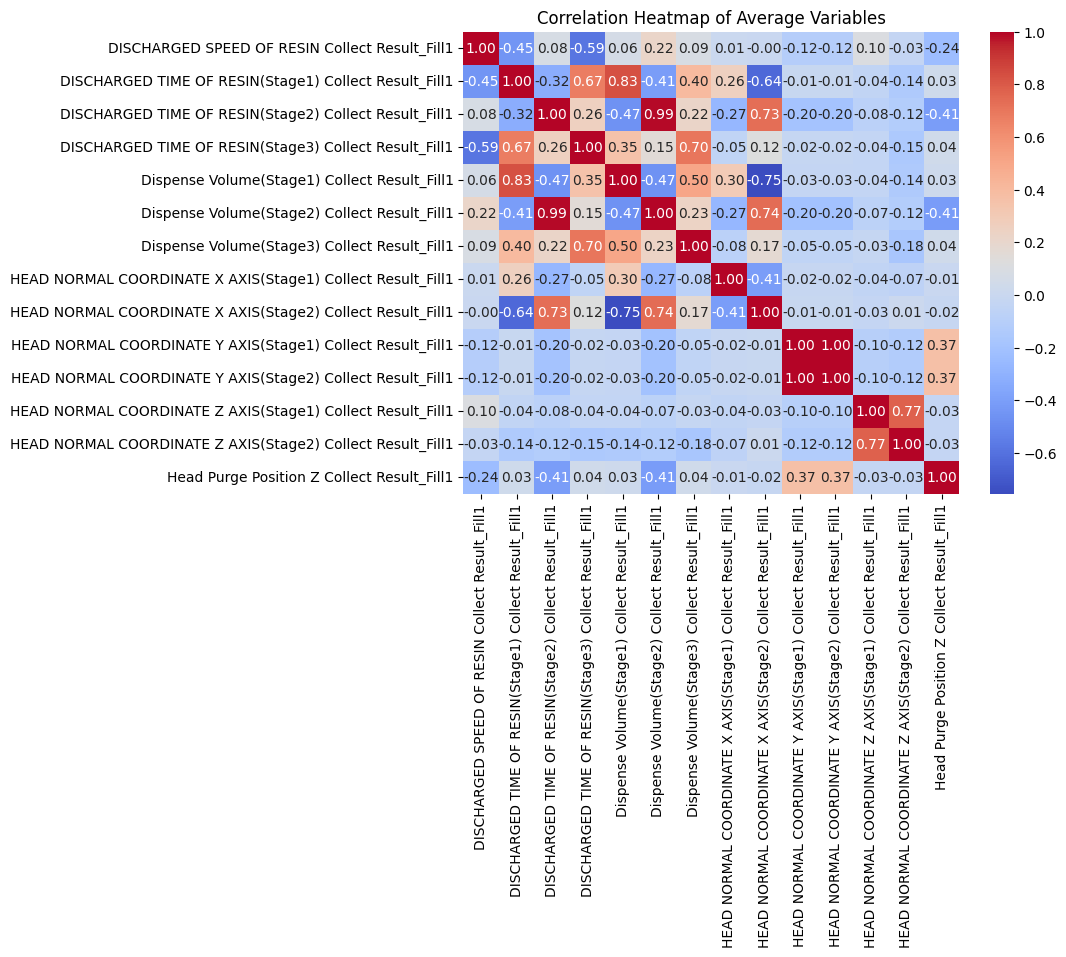

In [251]:
# Select the new average variables
avg_variables = [
    'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
'Dispense Volume(Stage1) Collect Result_Fill1',
'Dispense Volume(Stage2) Collect Result_Fill1',
'Dispense Volume(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
'Head Purge Position Z Collect Result_Fill1'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [252]:
columns_to_drop = ['HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1', 'Dispense Volume(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [253]:
# '_fill2'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_Fill2').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Fill2
CURE END POSITION Z Collect Result_Fill2
CURE SPEED Collect Result_Fill2
CURE STANDBY POSITION Z Collect Result_Fill2
CURE START POSITION X Collect Result_Fill2
CURE START POSITION Z Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
Head Purge Position Z Collect Result_Fill2
Machine Tact time Collect Result_Fill2
Receip No Collect Result_Fill2
WorkMode Collect Result_Fill2


In [254]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Model.Suffix                                                40506 non-null  object 
 1   Workorder                                                   40506 non-null  object 
 2   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 3   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 4   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 5   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 6   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 7   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 

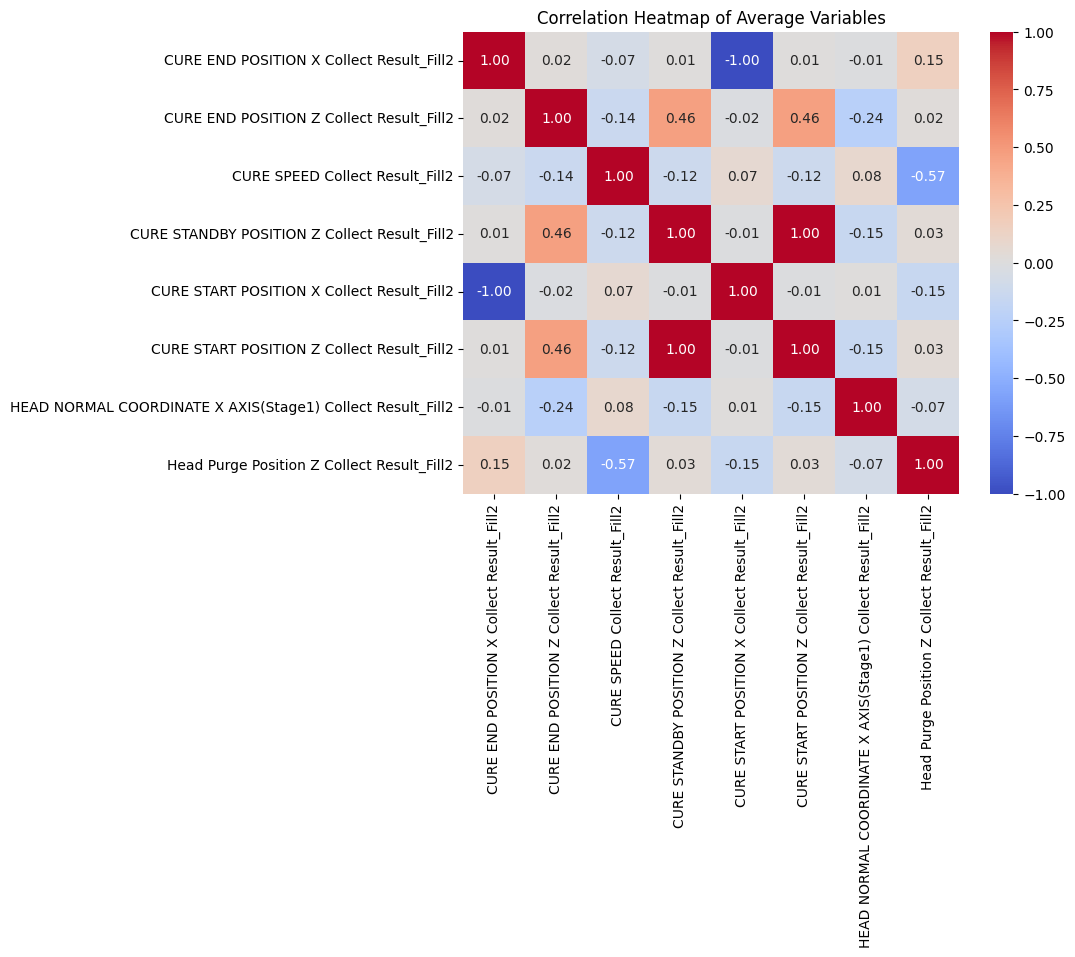

In [255]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Fill2',
'CURE END POSITION Z Collect Result_Fill2',
'CURE SPEED Collect Result_Fill2',
'CURE STANDBY POSITION Z Collect Result_Fill2',
'CURE START POSITION X Collect Result_Fill2',
'CURE START POSITION Z Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'Head Purge Position Z Collect Result_Fill2'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [256]:
columns_to_drop = ['CURE START POSITION Z Collect Result_Fill2']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [257]:
# '_Autoclave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data_cleaned.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("<Autoclave 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Autoclave 공정 관련 변수>
1st Pressure Collect Result_AutoClave
1st Pressure 1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber Temp. Collect Result_AutoClave
Chamber Temp. Unit Time_AutoClave


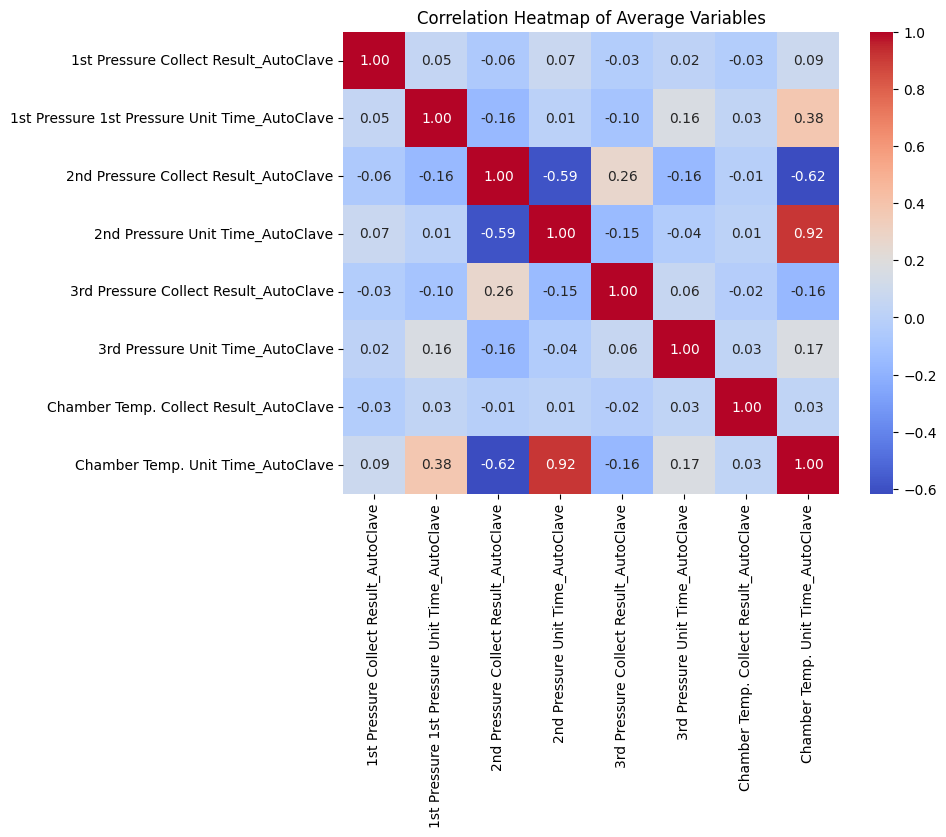

In [258]:
# Select the new average variables
avg_variables = [
    '1st Pressure Collect Result_AutoClave',
'1st Pressure 1st Pressure Unit Time_AutoClave',
'2nd Pressure Collect Result_AutoClave',
'2nd Pressure Unit Time_AutoClave',
'3rd Pressure Collect Result_AutoClave',
'3rd Pressure Unit Time_AutoClave',
'Chamber Temp. Collect Result_AutoClave',
'Chamber Temp. Unit Time_AutoClave'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [259]:
columns_to_drop = ['Chamber Temp. Unit Time_AutoClave']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop,inplace=False)
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop,inplace=False)

In [260]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 52 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Model.Suffix                                                40506 non-null  object 
 1   Workorder                                                   40506 non-null  object 
 2   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 3   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 4   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 5   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 6   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 7   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 

In [178]:
train_data_cleaned

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,...,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Dispenser_num
0,AJX75334505,4F1XA938-1,240,100,16,14.9,8.4,1.04,0.58,1.02,...,48,33,1020,835.5,114.612,19.9,1,NaN,Normal,#1
1,AJX75334505,3KPM0016-2,240,70,10,21.3,4.9,1.49,0.34,1.49,...,50,33,1020,835.5,85.000,19.6,1,0.0,Normal,#1
2,AJX75334501,4E1X9167-1,1000,85,16,14.7,8.5,1.61,0.93,1.61,...,50,33,1020,305.0,114.612,19.8,1,NaN,Normal,#2
3,AJX75334501,3K1X0057-1,1000,70,10,21.3,8.4,1.49,0.58,1.49,...,50,33,1020,305.0,85.000,19.9,1,0.0,Normal,#2
4,AJX75334501,3HPM0007-1,240,70,10,9.7,4.9,0.67,0.34,1.49,...,50,33,1020,835.5,85.000,19.7,1,0.0,Normal,#1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,10,17.0,5.0,1.19,0.35,1.49,...,50,33,1020,835.5,85.000,19.2,1,0.0,Normal,#1
40502,AJX75334501,4E1XC796-1,1000,100,16,14.9,8.5,1.04,0.59,1.49,...,48,33,1020,304.8,114.612,20.5,1,NaN,Normal,#2
40503,AJX75334501,4C1XD438-1,240,100,16,14.2,8.2,0.99,0.57,1.00,...,50,33,1020,835.5,85.000,19.7,1,NaN,Normal,#1
40504,AJX75334501,3I1XA258-1,1000,70,10,9.7,4.9,0.67,0.34,1.49,...,50,33,1020,305.0,85.000,20.1,1,0.0,Normal,#2


In [180]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Model.Suffix                                                40506 non-null  object 
 1   Workorder                                                   40506 non-null  object 
 2   CURE END POSITION X Collect Result_Dam                      40506 non-null  int64  
 3   CURE SPEED Collect Result_Dam                               40506 non-null  int64  
 4   DISCHARGED SPEED OF RESIN Collect Result_Dam                40506 non-null  int64  
 5   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         40506 non-null  float64
 6   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         40506 non-null  float64
 7   Dispense Volume(Stage1) Collect Result_Dam                  40506 non-null  float64
 

모델링

In [263]:
test_data_cleaned.info()

test_data_cleaned['target'] = test_data_cleaned['target'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Set ID                                                      17361 non-null  object 
 1   Model.Suffix                                                17361 non-null  object 
 2   Workorder                                                   17361 non-null  object 
 3   CURE END POSITION X Collect Result_Dam                      17361 non-null  float64
 4   CURE SPEED Collect Result_Dam                               17361 non-null  int64  
 5   DISCHARGED SPEED OF RESIN Collect Result_Dam                17361 non-null  int64  
 6   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         17361 non-null  float64
 7   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         17361 non-null  float64
 

In [264]:
test_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Set ID                                                      17361 non-null  object 
 1   Model.Suffix                                                17361 non-null  object 
 2   Workorder                                                   17361 non-null  object 
 3   CURE END POSITION X Collect Result_Dam                      17361 non-null  float64
 4   CURE SPEED Collect Result_Dam                               17361 non-null  int64  
 5   DISCHARGED SPEED OF RESIN Collect Result_Dam                17361 non-null  int64  
 6   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         17361 non-null  float64
 7   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam         17361 non-null  float64
 

In [265]:
# object 타입의 변수 출력
train_object_columns = train_data_cleaned.select_dtypes(include=['object']).columns
test_object_columns = test_data_cleaned.select_dtypes(include=['object']).columns

print(train_object_columns, f" train_object_columns 갯수 : {len(train_object_columns)}")
print(test_object_columns, f" test_object_columns 갯수 : {len(test_object_columns)}")

Index(['Model.Suffix', 'Workorder', 'target', 'Dispenser_num'], dtype='object')  train_object_columns 갯수 : 4
Index(['Set ID', 'Model.Suffix', 'Workorder', 'target', 'Dispenser_num'], dtype='object')  test_object_columns 갯수 : 5


In [266]:
# 타겟 변수와 범주형 변수 지정
## Target Encoding의 smoothing 파라미터는 default로 auto로 설정되어 있음
target = 'target'  # 타겟 변수 이름으로 변경
categorical_columns = [
    'Model.Suffix',
    'Workorder',
    'Dispenser_num'
]  # 범주형 변수 이름으로 변경

# 타겟 값을 숫자로 변환
target_mapping = {'Normal': 0, 'AbNormal': 1}
train_data_cleaned[target] = train_data_cleaned[target].map(target_mapping)
test_data_cleaned[target] = train_data_cleaned[target].map(target_mapping)

In [267]:
train_data_cleaned

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,...,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Dispenser_num
0,AJX75334505,4F1XA938-1,240,100,16,14.9,8.4,1.04,1.02,550.5,...,48,33,1020,835.5,114.612,19.9,1,NaN,0,#1
1,AJX75334505,3KPM0016-2,240,70,10,21.3,4.9,1.49,1.49,550.3,...,50,33,1020,835.5,85.000,19.6,1,0.0,0,#1
2,AJX75334501,4E1X9167-1,1000,85,16,14.7,8.5,1.61,1.61,162.4,...,50,33,1020,305.0,114.612,19.8,1,NaN,0,#2
3,AJX75334501,3K1X0057-1,1000,70,10,21.3,8.4,1.49,1.49,162.4,...,50,33,1020,305.0,85.000,19.9,1,0.0,0,#2
4,AJX75334501,3HPM0007-1,240,70,10,9.7,4.9,0.67,1.49,549.0,...,50,33,1020,835.5,85.000,19.7,1,0.0,0,#1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,10,17.0,5.0,1.19,1.49,550.3,...,50,33,1020,835.5,85.000,19.2,1,0.0,0,#1
40502,AJX75334501,4E1XC796-1,1000,100,16,14.9,8.5,1.04,1.49,163.5,...,48,33,1020,304.8,114.612,20.5,1,NaN,0,#2
40503,AJX75334501,4C1XD438-1,240,100,16,14.2,8.2,0.99,1.00,550.6,...,50,33,1020,835.5,85.000,19.7,1,NaN,0,#1
40504,AJX75334501,3I1XA258-1,1000,70,10,9.7,4.9,0.67,1.49,162.4,...,50,33,1020,305.0,85.000,20.1,1,0.0,0,#2


In [268]:
# Assuming df is your DataFrame
missing_values = train_data_cleaned.isnull().sum()

# Filter columns that have missing values
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

WorkMode Collect Result_Dam      24059
WorkMode Collect Result_Fill1    24059
WorkMode Collect Result_Fill2    24059
dtype: int64


In [269]:
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop, errors='ignore')
test_data_cleaned = test_data_cleaned.drop(columns=columns_to_drop, errors='ignore')

In [285]:
# 열이 존재하는지 확인
missing_columns = [col for col in categorical_columns if col not in train_data.columns]
if missing_columns:
    raise ValueError(f"train_data에 다음 열이 존재하지 않습니다: {missing_columns}")

# 타겟 인코더 생성 및 학습
encoder = ce.TargetEncoder(cols=categorical_columns)
train_data = encoder.fit_transform(train_data_cleaned, train_data_cleaned[target])

In [286]:
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,...,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,target,Dispenser_num
0,0.049336,0.158385,240,100,16,14.9,8.4,1.04,1.02,550.5,...,33,48,33,1020,835.5,114.612,19.9,1,0,0.058614
1,0.049336,0.015314,240,70,10,21.3,4.9,1.49,1.49,550.3,...,33,50,33,1020,835.5,85.000,19.6,1,0,0.058614
2,0.056712,0.009534,1000,85,16,14.7,8.5,1.61,1.61,162.4,...,33,50,33,1020,305.0,114.612,19.8,1,0,0.054977
3,0.056712,0.057143,1000,70,10,21.3,8.4,1.49,1.49,162.4,...,33,50,33,1020,305.0,85.000,19.9,1,0,0.054977
4,0.056712,0.109495,240,70,10,9.7,4.9,0.67,1.49,549.0,...,32,50,33,1020,835.5,85.000,19.7,1,0,0.058614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,0.056712,0.038691,240,70,10,17.0,5.0,1.19,1.49,550.3,...,33,50,33,1020,835.5,85.000,19.2,1,0,0.058614
40502,0.056712,0.015853,1000,100,16,14.9,8.5,1.04,1.49,163.5,...,33,48,33,1020,304.8,114.612,20.5,1,0,0.054977
40503,0.056712,0.029200,240,100,16,14.2,8.2,0.99,1.00,550.6,...,33,50,33,1020,835.5,85.000,19.7,1,0,0.058614
40504,0.056712,0.034722,1000,70,10,9.7,4.9,0.67,1.49,162.4,...,33,50,33,1020,305.0,85.000,20.1,1,0,0.054977


In [287]:
# Set ID 열을 별도로 저장
set_id = test_data_cleaned['Set ID']

# 테스트 데이터 인코딩 (Set ID 열 제외)
test_data = test_data_cleaned.drop(columns=['Set ID'])
test_data = encoder.transform(test_data)

# Set ID 열을 맨 앞에 추가
test_data.insert(0, 'Set ID', set_id)

# categorical_columns에 해당하는 열의 데이터 값만 확인
print(train_data[categorical_columns].head(3))
print(test_data[categorical_columns].head(3))

# 역 매핑 딕셔너리 생성
reverse_target_mapping = {v: k for k, v in target_mapping.items()}

# 타겟 값을 원래대로 변환
train_data[target] = train_data[target].map(reverse_target_mapping)
test_data[target] = test_data[target].map(reverse_target_mapping)

   Model.Suffix  Workorder  Dispenser_num
0      0.049336   0.158385       0.058614
1      0.049336   0.015314       0.058614
2      0.056712   0.009534       0.054977
   Model.Suffix  Workorder  Dispenser_num
0      0.056712   0.091912       0.054977
1      0.056712   0.024247       0.054977
2      0.056712   0.091463       0.058614


In [289]:
test_data
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,...,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,target,Dispenser_num
0,0.049336,0.158385,240,100,16,14.9,8.4,1.04,1.02,550.5,...,33,48,33,1020,835.5,114.612,19.9,1,Normal,0.058614
1,0.049336,0.015314,240,70,10,21.3,4.9,1.49,1.49,550.3,...,33,50,33,1020,835.5,85.000,19.6,1,Normal,0.058614
2,0.056712,0.009534,1000,85,16,14.7,8.5,1.61,1.61,162.4,...,33,50,33,1020,305.0,114.612,19.8,1,Normal,0.054977
3,0.056712,0.057143,1000,70,10,21.3,8.4,1.49,1.49,162.4,...,33,50,33,1020,305.0,85.000,19.9,1,Normal,0.054977
4,0.056712,0.109495,240,70,10,9.7,4.9,0.67,1.49,549.0,...,32,50,33,1020,835.5,85.000,19.7,1,Normal,0.058614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,0.056712,0.038691,240,70,10,17.0,5.0,1.19,1.49,550.3,...,33,50,33,1020,835.5,85.000,19.2,1,Normal,0.058614
40502,0.056712,0.015853,1000,100,16,14.9,8.5,1.04,1.49,163.5,...,33,48,33,1020,304.8,114.612,20.5,1,Normal,0.054977
40503,0.056712,0.029200,240,100,16,14.2,8.2,0.99,1.00,550.6,...,33,50,33,1020,835.5,85.000,19.7,1,Normal,0.058614
40504,0.056712,0.034722,1000,70,10,9.7,4.9,0.67,1.49,162.4,...,33,50,33,1020,305.0,85.000,20.1,1,Normal,0.054977


In [291]:
df_train, df_val = train_test_split(
    train_data,
    test_size=0.2,
    stratify=train_data["target"],
    random_state=RANDOM_STATE,
)

def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 30524, AbNormal: 1880 ratio: 0.06159087930808544
  Total: Normal: 7632, AbNormal: 470 ratio: 0.061582809224318656


In [292]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    weighted_F1 = f1_score(y_test, y_pred, average='weighted')

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1],
        'Weighted F1': [weighted_F1]
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)

In [300]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

In [301]:
# df_train 데이터로 학습
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

y_val = df_val['target'] 
x_val = df_val.drop(columns=['target']) 

In [302]:
model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

In [305]:
y_val

20458    AbNormal
15042      Normal
37892      Normal
4516       Normal
35486      Normal
           ...   
852        Normal
115        Normal
29445      Normal
23738      Normal
5321       Normal
Name: target, Length: 8102, dtype: object

In [306]:
y_pred = model.predict(x_val)

# Calculate the F1 score, specifying the positive label
f1 = f1_score(y_val, y_pred, pos_label='AbNormal')
print(f"F1 Score: {f1:.4f}")

# Generate and print the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=['AbNormal', 'Normal'])
print("Confusion Matrix:")
print(cm)

F1 Score: 0.0814
Confusion Matrix:
[[  23  447]
 [  72 7560]]


In [79]:
test_pred = model.predict(df_test_x)
test_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'AbNormal', 'Normal'],
      dtype=object)

In [80]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/submission.csv")
df_sub["target"] = test_pred

In [81]:
df_sub['target'].value_counts()

target
Normal      17054
AbNormal      307
Name: count, dtype: int64

In [82]:
# 제출 파일 저장
df_sub.to_csv("0813sub.csv", index=False)